<a href="https://colab.research.google.com/github/dietadestina/PA_EVCast/blob/main/data_ev_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

ev_sales = pd.read_csv('https://raw.githubusercontent.com/dietadestina/AI4Jobs_program/refs/heads/main/ev_sales_by_makers_and_cat_15-24.csv')
ev_sales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [346]:
ev_sales['Maker'] = ev_sales['Maker'].replace('"', '', regex=True)
ev_sales


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,VOLVO GROUP INDIA PVT LTD,0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [347]:
ev_sales.isna().sum()

,0
Cat,0
Maker,0
2015,0
2016,0
2017,0
2018,0
2019,0
2020,0
2021,0
2022,0


In [348]:
ev_sales.duplicated().sum()

0

In [349]:
ev_sales.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,5.593074,35.533189,62.784271,93.624098,119.614719,89.300144,237.268398,736.315296,1103.343434,706.308081
std,62.430741,400.757230,496.932817,511.486338,692.529043,504.744348,1793.878376,5917.016908,9631.219039,7022.251339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,3.000000,6.000000,10.000000,7.000000,13.000000,39.000000,96.000000,79.000000
max,1708.000000,13401.000000,15094.000000,10816.000000,13213.000000,9543.000000,46260.000000,109398.000000,267355.000000,211273.000000


In [350]:
import numpy as np
from scipy import stats
kolom_numerik = [str(year) for year in range(2015, 2025)]
ev_sales = ev_sales[(np.abs(stats.zscore(ev_sales[kolom_numerik])) < 3).all(axis=1)]
ev_sales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,VOLVO GROUP INDIA PVT LTD,0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [351]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ev_sales[kolom_numerik] = scaler.fit_transform(ev_sales[kolom_numerik])
ev_sales

<ipython-input-351-de0f26db57bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales[kolom_numerik] = scaler.fit_transform(ev_sales[kolom_numerik])


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,VOLVO GROUP INDIA PVT LTD,0.0,0.000000,0.030303,0.008734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3W,3EV INDUSTRIES PVT LTD,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.023539,0.029703,0.022666,0.002618
2,2W,3GB TECHNOLOGY PVT LTD,0.0,0.000000,0.000000,0.000728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3W,3GB TECHNOLOGY PVT LTD,0.0,0.001311,0.000978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3W,3S INDUSTRIES PRIVATE LIMITED,0.0,0.000000,0.000000,0.000000,0.025876,0.044715,0.009037,0.005179,0.011063,0.029673
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001599,0.001871,0.000462
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002662,0.000308
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002772
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000257


In [352]:
le = LabelEncoder()
ev_sales['Cat'] = le.fit_transform(ev_sales['Cat'])
ev_sales['Maker'] = le.fit_transform(ev_sales['Maker'])

ev_sales.tail(10)

<ipython-input-352-f11d583b6406>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales['Cat'] = le.fit_transform(ev_sales['Cat'])
<ipython-input-352-f11d583b6406>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales['Maker'] = le.fit_transform(ev_sales['Maker'])


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1376,2,1168,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000076,0.000000,0.000000
1377,1,1169,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.024800,0.016984,0.029861,0.031418
1378,1,1170,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.029094,0.148180,0.183685
1379,1,1171,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000228,0.000457,0.002824
1380,1,1172,0.0,0.0,0.00391,0.008734,0.006469,0.00542,0.003153,0.001752,0.001539,0.000975
1381,0,1173,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.001599,0.001871,0.000462
1382,0,1174,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.002662,0.000308
1383,0,1175,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.002772
1384,0,1176,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000257
1385,1,1177,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000381,0.005448,0.003799


In [353]:
ev_sales = pd.melt(ev_sales, id_vars=['Cat', 'Maker'], var_name='Year', value_name='Value')
ev_sales.tail(10)

,Cat,Maker,Year,Value
13390,2,1168,2024,0.000000
13391,1,1169,2024,0.031418
13392,1,1170,2024,0.183685
13393,1,1171,2024,0.002824
13394,1,1172,2024,0.000975
13395,0,1173,2024,0.000462
13396,0,1174,2024,0.000308
13397,0,1175,2024,0.002772
13398,0,1176,2024,0.000257
13399,1,1177,2024,0.003799


In [354]:
from google.colab import files

ev_sales.to_csv('ev_sales.csv', index=False)
#files.download('ev_sales.csv')

In [356]:
features = ev_sales[['Cat', 'Maker', 'Year']].values.astype(float)
target = ev_sales['Value'].values.astype(float)

# Transformasi data menjadi sequence
sequence_length = 12  # menggunakan 12 langkah waktu sebelumnya
X, y = [], []
for i in range(len(features) - sequence_length):
    X.append(features[i:i + sequence_length])
    y.append(target[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Pelatihan model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss = model.evaluate(X_test, y_test)
print("Model Loss:", loss)

# Prediksi
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0570 - val_loss: 0.0065
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0054 - val_loss: 0.0065
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0052 - val_loss: 0.0066
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0047 - val_loss: 0.0068
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0054 - val_loss: 0.0071
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 9/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0054 - val_loss: 0.0065
Epoch 10/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0050 - val_loss: 0.0065
Epoch 11/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 12/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 

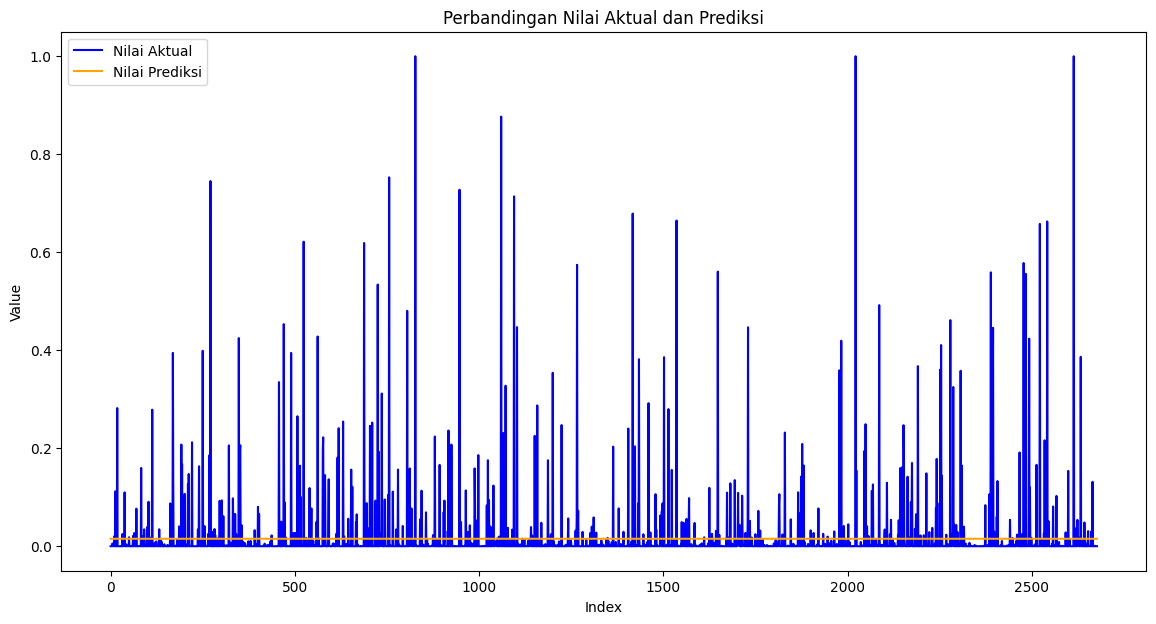

In [357]:
import matplotlib.pyplot as plt

# Menggunakan kembali y_test dan predictions
# Mengubah predictions kembali ke skala asli jika diperlukan (jika sudah dinormalisasi)
# Di sini kita anggap predictions sudah sesuai dengan skala target

# Visualisasi
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Nilai Aktual', color='blue')
plt.plot(predictions, label='Nilai Prediksi', color='orange')
plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

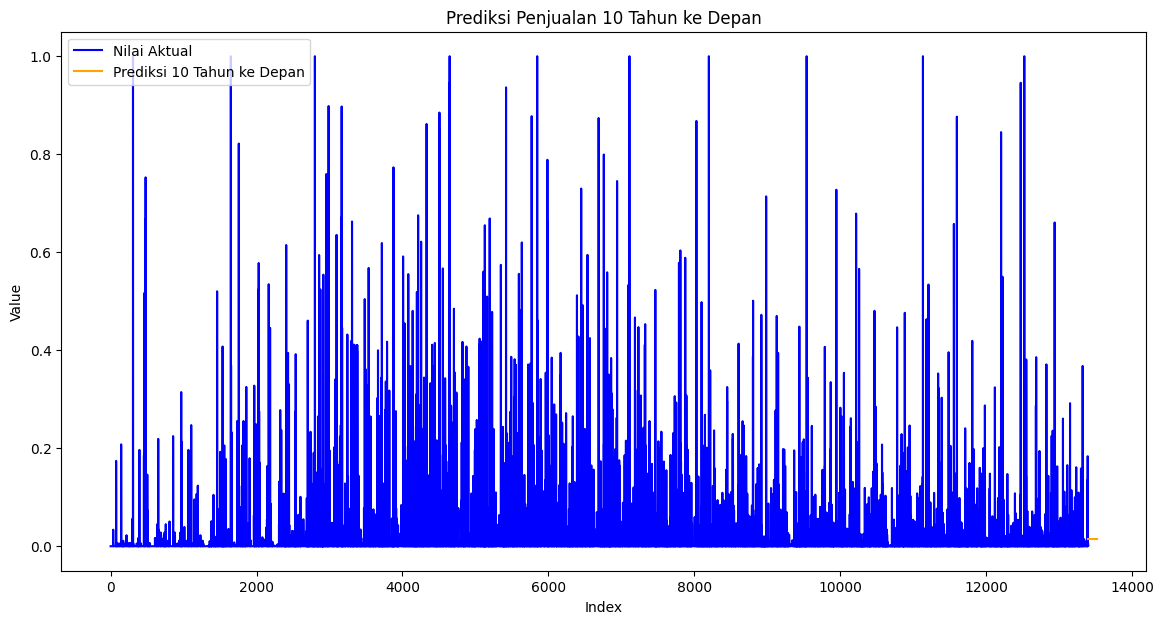

In [359]:
# Mengasumsikan 'features' adalah data yang digunakan untuk pelatihan model
# Kita akan menggunakan data terakhir dari features dan target untuk memulai prediksi

# Menyimpan hasil prediksi
predictions_future = []

# Ambil data terakhir untuk memulai prediksi
last_input = features[-sequence_length:]  # Ambil sequence terakhir

# Lakukan prediksi selama 10 tahun ke depan (misalnya, 10 * 12 = 120 bulan)
for _ in range(10 * 12):  # 10 tahun, setiap tahun 12 bulan
    # Reshape input untuk model
    last_input_reshaped = last_input.reshape((1, last_input.shape[0], last_input.shape[1]))

    # Lakukan prediksi
    predicted_value = model.predict(last_input_reshaped)

    # Simpan prediksi
    predictions_future.append(predicted_value[0, 0])

    # Update last_input dengan menambahkan prediksi ke dalam sequence
    last_input = np.append(last_input[1:], [[features[-1, 0], features[-1, 1], features[-1, 2]]], axis=0)
    # Update maker dan tahun untuk yang baru
    last_input[-1, 2] += 1  # Update tahun

# Mengubah predictions_future menjadi array numpy
predictions_future = np.array(predictions_future)

# Visualisasi hasil prediksi 10 tahun ke depan
plt.figure(figsize=(14, 7))
plt.plot(range(len(ev_sales)), ev_sales['Value'], label='Nilai Aktual', color='blue')  # Data aktual
plt.plot(range(len(ev_sales), len(ev_sales) + len(predictions_future)), predictions_future, label='Prediksi 10 Tahun ke Depan', color='orange')  # Prediksi
plt.title('Prediksi Penjualan 10 Tahun ke Depan')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()